In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

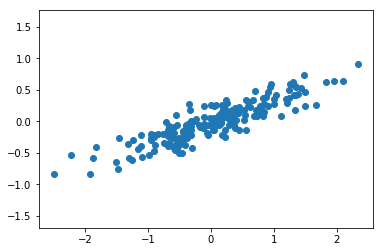

In [2]:
rng = np.random.RandomState(seed=1)
X = np.dot(rng.rand(2,2) , rng.randn(2,200)).T
plt.scatter(X[:,0] , X[:,1])#X[:,0]就是取所有行的第0个数据, X[:,1] 就是取所有行的第1个数据。
plt.axis('equal')

### 二維

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print (pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print (pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

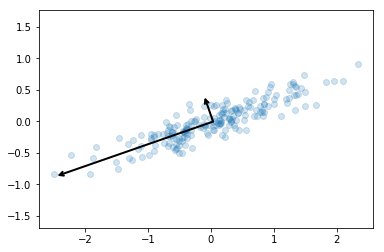

In [6]:
def draw_vector(v0 , v1 , ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->' , linewidth=2 , shrinkA=0 , shrinkB=0)
    ax.annotate('' , v1 , v0 , arrowprops = arrowprops)
plt.scatter(X[:,0] , X[:,1] , alpha=0.2)
for length , vector in zip(pca.explained_variance_ , pca.components_):
    v = vector *3 * np.sqrt(length)
    draw_vector(pca.mean_ , pca.mean_ + v)
plt.axis('equal')#讓軸長度一樣

### 一維

In [7]:
pca1 = PCA(n_components=1)
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

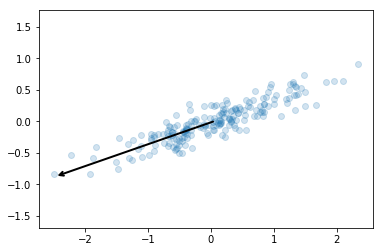

In [8]:
plt.scatter(X[:,0] , X[:,1] , alpha=0.2)
for length , vector in zip(pca1.explained_variance_ , pca1.components_):
    v = vector *3 * np.sqrt(length)
    draw_vector(pca.mean_ , pca1.mean_ + v)
plt.axis('equal')#讓軸長度一樣

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [10]:
pca_digit = PCA(2)
#project from 64 to 2 dimensions
projected = pca_digit.fit_transform(digits.data)
print ('原本的樣子' , digits.data.shape)
print ('投影完的樣子' , projected.shape)

原本的樣子 (1797, 64)
投影完的樣子 (1797, 2)


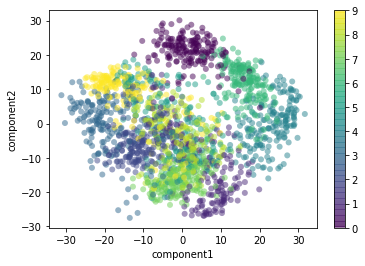

In [11]:
import matplotlib
import matplotlib.colors as col
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(projected[:,0] , projected[:,1] , c=digits.target , edgecolor='none', alpha=0.5)
plt.xlabel('component1')
plt.ylabel('component2')
plt.colorbar();

Text(0,0.5,'cumulative explained variance')

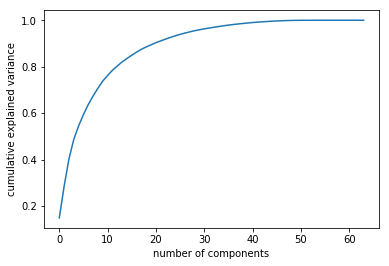

In [12]:
pca_EV = PCA().fit(digits.data)
plt.plot(np.cumsum(pca_EV.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

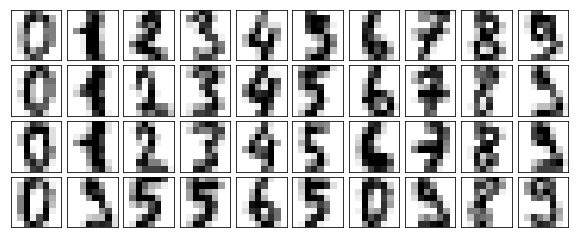

In [13]:
def plot_digits(data):
    fig , axes = plt.subplots(4,10 , figsize=(10,4),
                            subplot_kw={'xticks':[] , 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1 , wspace=0.1))
    for i , ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8) ,
                 cmap='binary' , interpolation='nearest' , 
                 clim=(0,16))
plot_digits(digits.data)

#### 加入雜訊

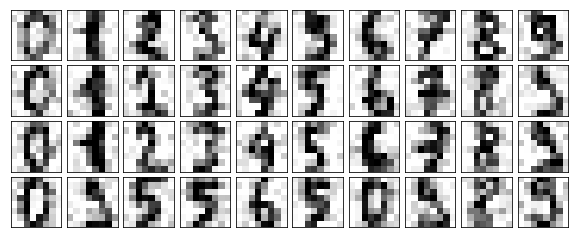

In [14]:
np.random.seed(13)
noisy=np.random.normal(digits.data , 2)#透過seed=13製造雜訊，normal()中數字越大雜訊越強
plot_digits(noisy)

#### 在雜訊中求生存ＱＱＱＱ

In [15]:
pca = PCA(n_components=0.5).fit(noisy)
print ('需要' , pca.n_components_ , '主要成分才可以保留50%的變異量')
#0<n_components<1，會自動轉換到「n個主要成分才可以保留多少%的變異量」，這邊的話輸入0.999就會讓n_components=64

需要 6 主要成分才可以保留50%的變異量


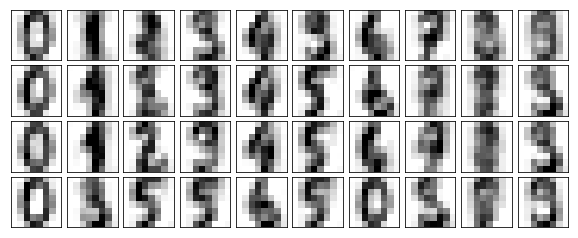

In [16]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)